### (1) Simulate data and analyze bias-and-variance during varying parameters of the model

• Write a function that simulates linear data points of the form
y = 0.6 ∗ x + sin(3x) ± e.
Sample x from an even distribution and e from a normal distribution.

• Use your function to create 500 training data points and 200 test data points.

• With the linear model smooth.spline and k-Nearest Neighbor knn, plot the bias-variance trade-
off for the model parameters degree of freedom and k

In [30]:
import numpy as np
import pandas as pd

def function(x):
    return 0.6 * x + np.sin(3*x) + np.random.normal(-1,1)

train_x = np.random.uniform(-10,10,500)

train_y = [ function(x) for x in train_x] 
test_x = np.random.uniform(-10,10,200)
test_y = [ function(x) for x in test_x]


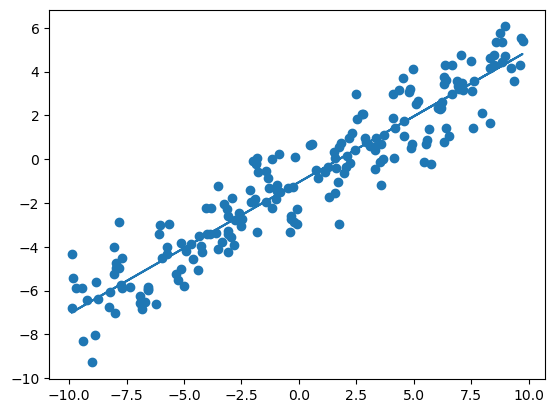

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
import matplotlib.pyplot as plt

model = make_pipeline(PolynomialFeatures(1), Ridge())
model.fit(train_x.reshape(-1,1), train_y)
y_pred = model.predict(test_x.reshape(-1,1))
plt.scatter(test_x, test_y)
plt.plot(test_x, y_pred)




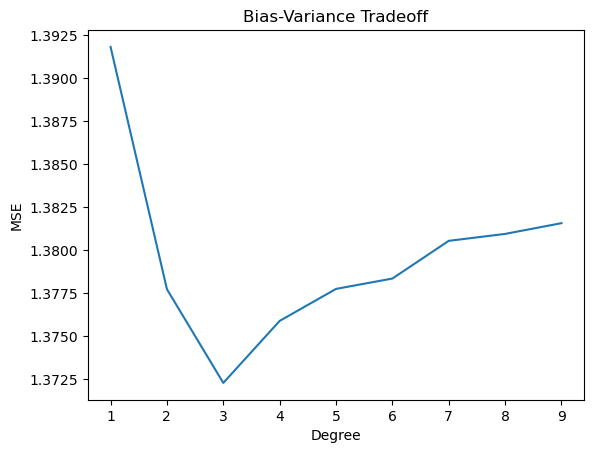

In [38]:
def bias_variance_tradeoff(model, train_x, train_y, test_x, test_y, degrees):
    mse = []
    for degree in degrees:
        model = make_pipeline(SplineTransformer(n_knots=10 , degree=degree), Ridge())
        model.fit(train_x.reshape(-1,1), train_y)
        y_pred = model.predict(test_x.reshape(-1,1))
        mse.append(mean_squared_error(test_y, y_pred))
    return mse

degrees = np.arange(1,10)
mse = bias_variance_tradeoff(model, train_x, train_y, test_x, test_y, degrees)
plt.plot(degrees, mse)
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('Bias-Variance Tradeoff Spline')
plt.show()

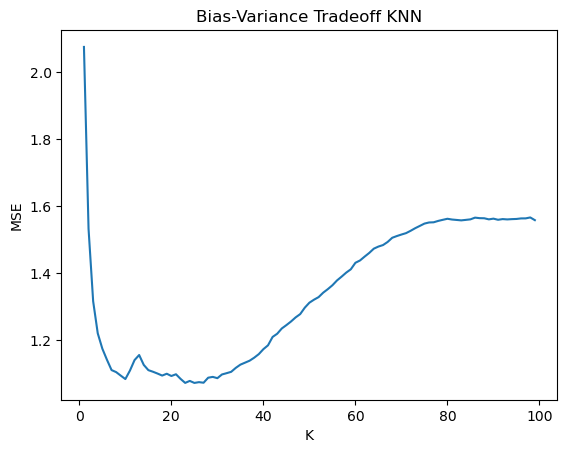

In [40]:
def bias_variance_tradeoff_knn(train_x, train_y, test_x, test_y, ks):
    mse = []
    for k in ks:
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(train_x.reshape(-1,1), train_y)
        y_pred = model.predict(test_x.reshape(-1,1))
        mse.append(mean_squared_error(test_y, y_pred))
    return mse

ks = np.arange(1,100)
mse = bias_variance_tradeoff_knn(train_x, train_y, test_x, test_y, ks)
plt.plot(ks, mse)
plt.xlabel('K')
plt.ylabel('MSE')
plt.title('Bias-Variance Tradeoff KNN')
plt.show()


## (2) Implement Information Criteria and Comparing Models

- Download the diagnosis dataset. Columns are features, rows are samples.
- Column name `2` is the target feature (feature that is to be predicted).
- Split the data into a test set (30%) and a training set (70%).
- Implement functions to calculate AIC and BIC from a regression model.
- Build at least three different regression models using Linear Regression, Spline, or another regression model, to predict the value of Column `2` in `diagnosis.csv` data.
- Compare the models in terms of AIC and BIC and compare Mean Squared Error on test data.  
  *Hint: `regsubsets` in the `leaps` library (R) can show you regression results with a subset of variables.*


In [60]:
import numpy as np

# Log-Likelihood Function (LLF)
def llf(model, y, y_pred):
    """
    Calculate the log-likelihood function (LLF) for a regression model.

    Parameters:
        model: A fitted regression model.
        y: The actual target values.
        y_pred: The predicted target values.

    Returns:
        The log-likelihood value, which is a measure of model fit. Higher values indicate a better fit.
    """
    # Residual sum of squares (RSS): (y - y_pred)**2
    # The log-likelihood assumes Gaussian errors, and the formula penalizes poor model fit.
    return -0.5 * len(y) * np.log(np.sum((y - y_pred) ** 2))

# Akaike Information Criterion (AIC)
def aic(model, y, y_pred):
    """
    Calculate Akaike Information Criterion (AIC) for a regression model.

    Parameters:
        model: A fitted regression model.
        y: The actual target values.
        y_pred: The predicted target values.

    Returns:
        The AIC value.
    """
    n = len(y)  # Number of observations
    k = model.coef_.shape[0]  # Number of model parameters (coefficients)
    rss = np.sum((y - y_pred) ** 2)  # Residual sum of squares
    return n * np.log(rss / n) + 2 * k

# Define a function to compute BIC
def bic(model, y, y_pred):
    """
    Calculate Bayesian Information Criterion (BIC) for a regression model.

    Parameters:
        model: A fitted regression model.
        y: The actual target values.
        y_pred: The predicted target values.

    Returns:
        The BIC value.
    """
    n = len(y)  # Number of observations
    k = model.coef_.shape[0]  # Number of model parameters (coefficients)
    rss = np.sum((y - y_pred) ** 2)  # Residual sum of squares
    return n * np.log(rss / n) + k * np.log(n)



In [61]:
df= pd.read_csv('diagnosis.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = df.drop(columns=['2'])
y = df['2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('AIC:', aic(model, y_test, y_pred))
print('BIC:', bic(model, y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))



AIC: 34.243151761147566
BIC: 131.63472201273004
MSE: 0.00497174543462899


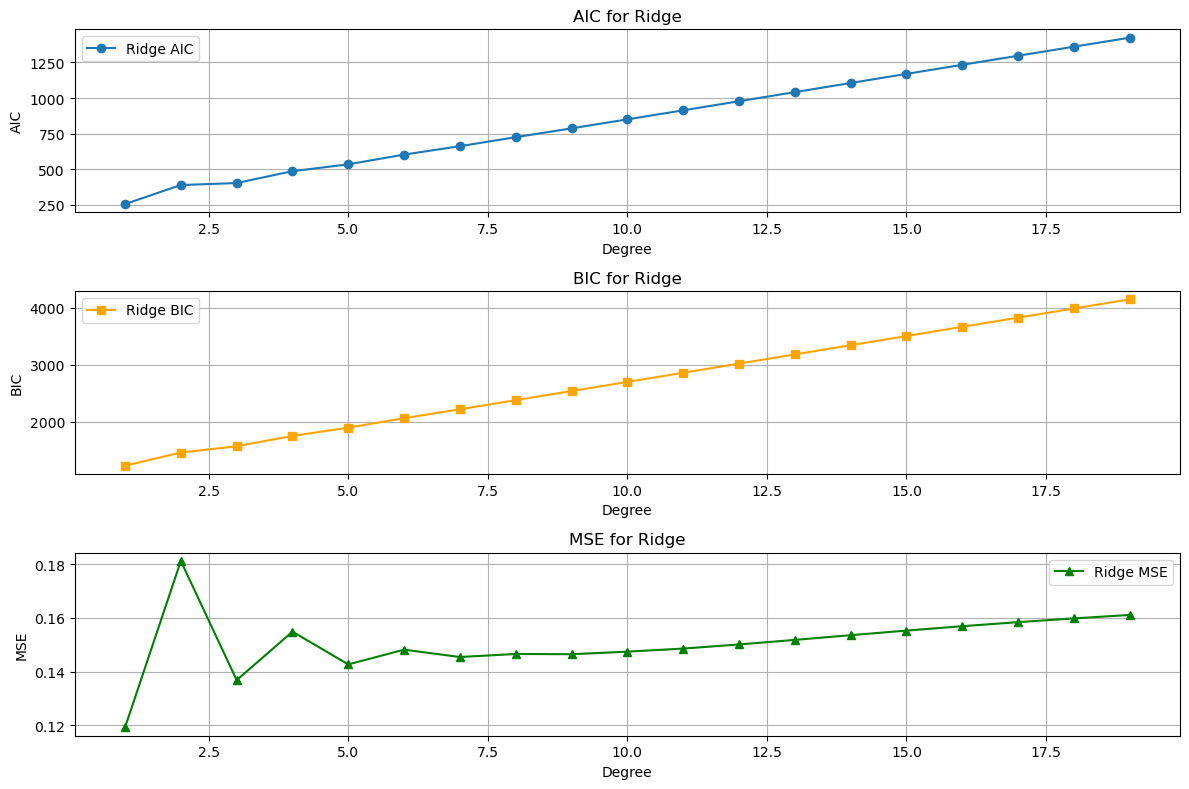

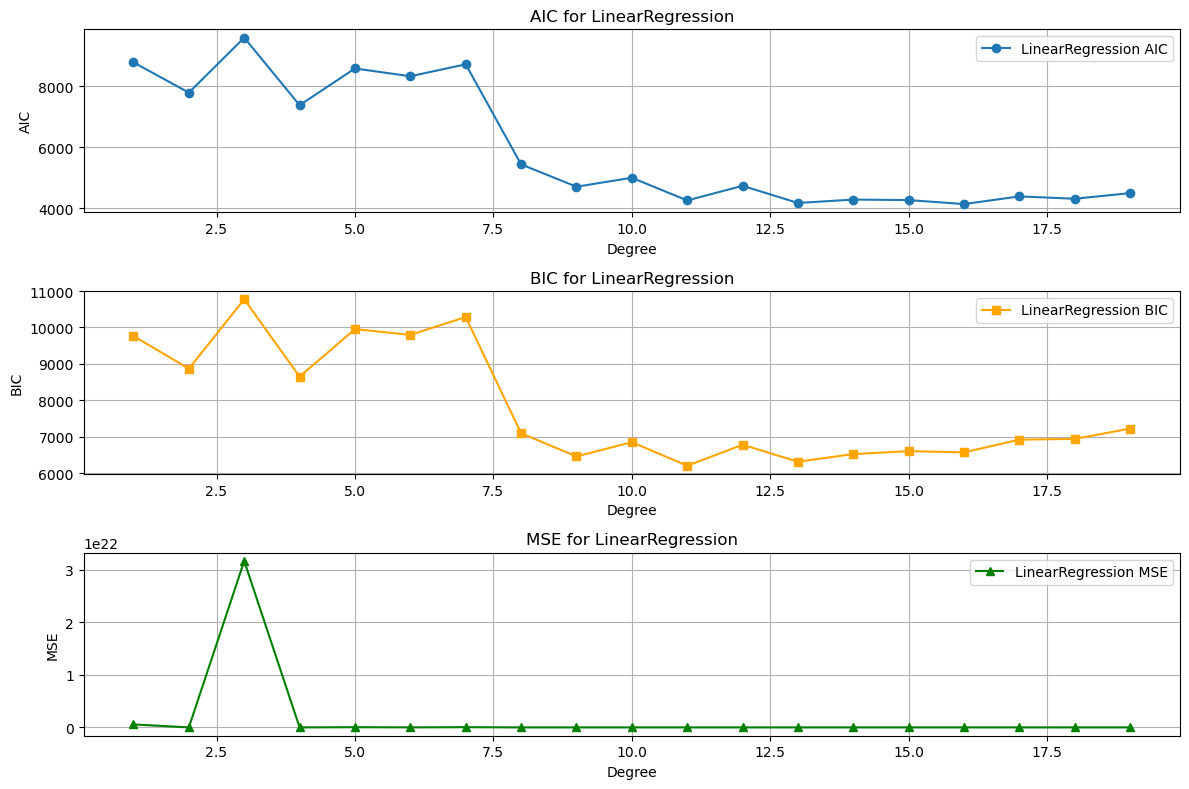

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import Ridge, LinearRegression

# Modified function to calculate both AIC and BIC, and allow trying different models
def bias_variance_tradeoff_AIC_BIC(train_x, train_y, test_x, test_y, degrees, models):
    """
    Compute the AIC and BIC for different models with varying degrees of splines.

    Parameters:
        train_x: Training feature data.
        train_y: Training target data.
        test_x: Test feature data.
        test_y: Test target data.
        degrees: List of degrees for spline transformations.
        models: List of models to evaluate (e.g., Ridge, LinearRegression).

    Returns:
        A dictionary with AIC and BIC values for each degree and model.
    """
    results = {model.__class__.__name__: {'AIC': [], 'BIC': [],'MSE': []} for model in models}

    for degree in degrees:
        # Apply the spline transformation manually
        spline_transformer = SplineTransformer(n_knots=10, degree=degree)
        train_x_transformed = spline_transformer.fit_transform(train_x)
        test_x_transformed = spline_transformer.transform(test_x)

        for model in models:
            # Fit the regression model
            model.fit(train_x_transformed, train_y)

            # Make predictions
            y_pred = model.predict(test_x_transformed)

            # Calculate AIC and BIC
            aic_value = aic(model, test_y, y_pred)
            bic_value = bic(model, test_y, y_pred)
            mse_value = mean_squared_error(test_y, y_pred)


            # Append results for the current model
            results[model.__class__.__name__]['AIC'].append(aic_value)
            results[model.__class__.__name__]['BIC'].append(bic_value)
            results[model.__class__.__name__]['MSE'].append(mse_value)

    return results

# Example usage
degrees = np.arange(1, 20)
models = [Ridge(), LinearRegression()]
results = bias_variance_tradeoff_AIC_BIC(X_train, y_train, X_test, y_test, degrees, models)

# Plot AIC and BIC for each model
for model_name in results:
    plt.figure(figsize=(12, 8))  # Adjust the figure size for better visibility

    # Plot AIC
    plt.subplot(3, 1, 1)  # Create a grid with 3 rows and 1 column, this is the 1st plot
    plt.plot(degrees, results[model_name]['AIC'], marker='o', label=f'{model_name} AIC')
    plt.xlabel('Degree')
    plt.ylabel('AIC')
    plt.title(f'AIC for {model_name}')
    plt.legend()
    plt.grid(True)

    # Plot BIC
    plt.subplot(3, 1, 2)  # This is the 2nd plot
    plt.plot(degrees, results[model_name]['BIC'], marker='s', label=f'{model_name} BIC', color='orange')
    plt.xlabel('Degree')
    plt.ylabel('BIC')
    plt.title(f'BIC for {model_name}')
    plt.legend()
    plt.grid(True)

    # Plot MSE
    plt.subplot(3, 1, 3)  # This is the 3rd plot
    plt.plot(degrees, results[model_name]['MSE'], marker='^', label=f'{model_name} MSE', color='green')
    plt.xlabel('Degree')
    plt.ylabel('MSE')
    plt.title(f'MSE for {model_name}')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()  # Automatically adjust spacing to avoid overlap
    plt.show()
